In [63]:
import importlib
import pandas as pd
import json
import sys
import matplotlib.pyplot as plt

sys.path.insert(1, '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector')
print(sys.path)

import kad.kad_utils.kad_utils as kad_utils


kad_utils.customize_matplotlib_for_paper()

['/snap/pycharm-professional/260/plugins/python/helpers-pro/jupyter_debug', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector', '/snap/pycharm-professional/260/plugins/python/helpers/pydev', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector/venv_final/lib/python3.6/site-packages', '/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector/venv_final/lib/python3.6/site-packages/IPython/extensions', '/home/maciek/.ipython']


In [64]:
SARIMA_KEY: str = "SARIMA"
AUTOENCODER_KEY: str = "autoencoder"
ACC_KEY: str = "accuracy"
PREC_KEY: str = "precision"
RECALL_KEY: str = "recall"

CUSTOM_KEY: str = "total"
CUSTOM_ACC_KEY: str = "accuracy component"
CUSTOM_COLL_KEY: str = "collective component"
CUSTOM_PREC_KEY: str = "precision component"

In [65]:
with open("eval.json") as f:
    eval_dict = json.load(f)

In [66]:
def reorder_dictionary(p_eval_dict: dict):
    reordered_eval_dict = {}

    for k_file, v_file in p_eval_dict.items():
        for k_algo, v_algo in v_file.items():
            for algo_item in v_algo:
                for k_metric, v_metric in algo_item.items():
                    if k_file not in reordered_eval_dict:
                        reordered_eval_dict[k_file] = {}
                    if k_algo not in reordered_eval_dict[k_file]:
                        reordered_eval_dict[k_file][k_algo] = {}
                    if k_metric not in reordered_eval_dict[k_file][k_algo]:
                        reordered_eval_dict[k_file][k_algo][k_metric] = []
                    reordered_eval_dict[k_file][k_algo][k_metric].append(v_metric)

    return reordered_eval_dict


/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector/venv_final/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later


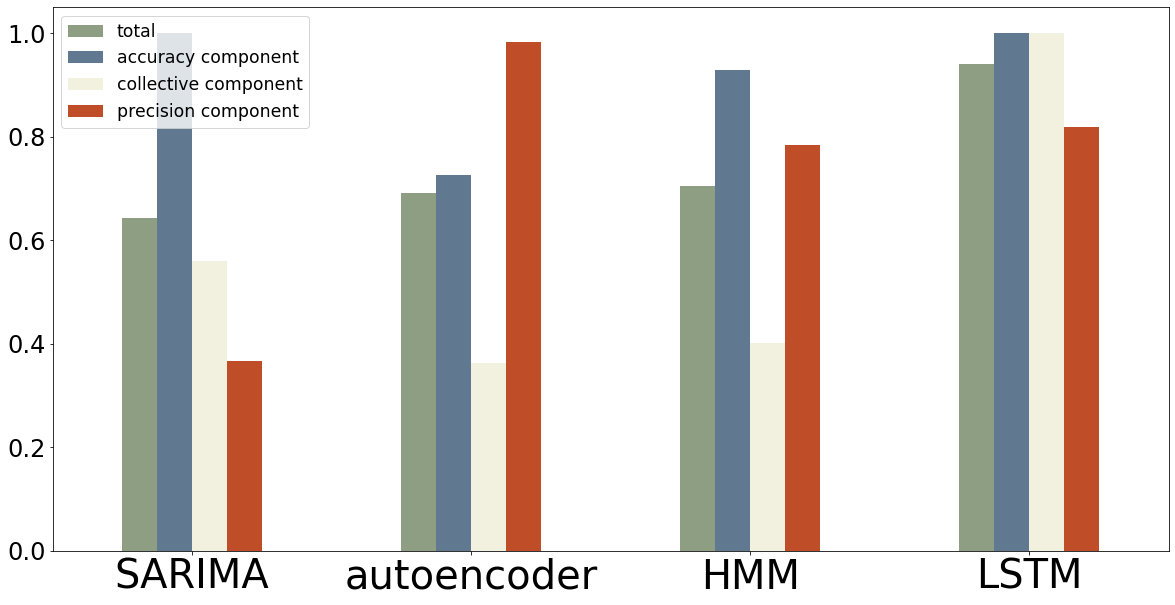

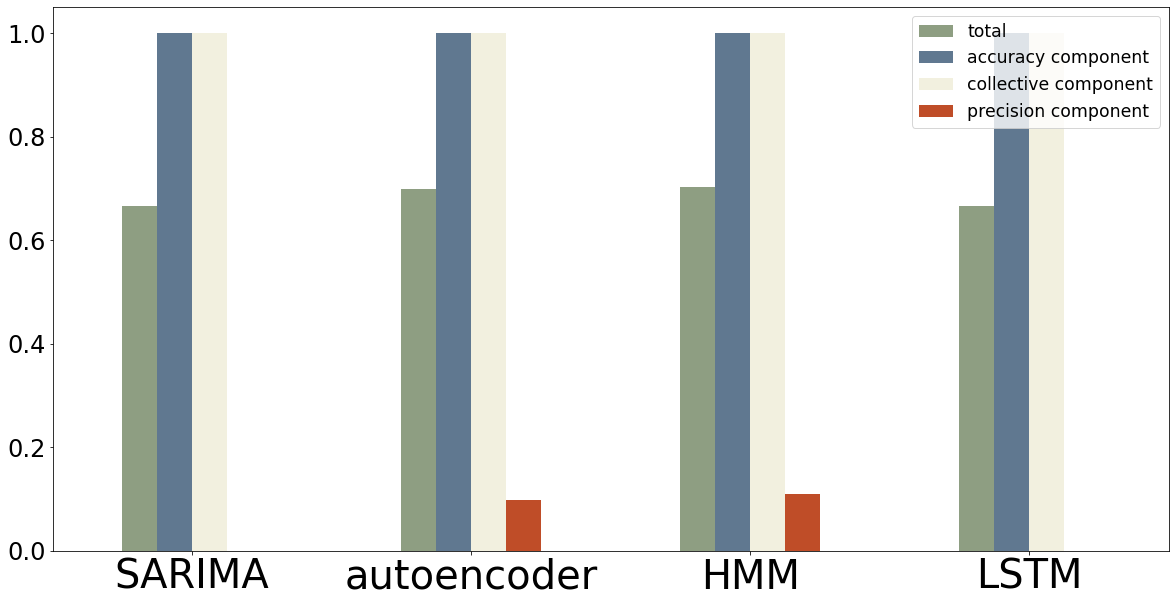

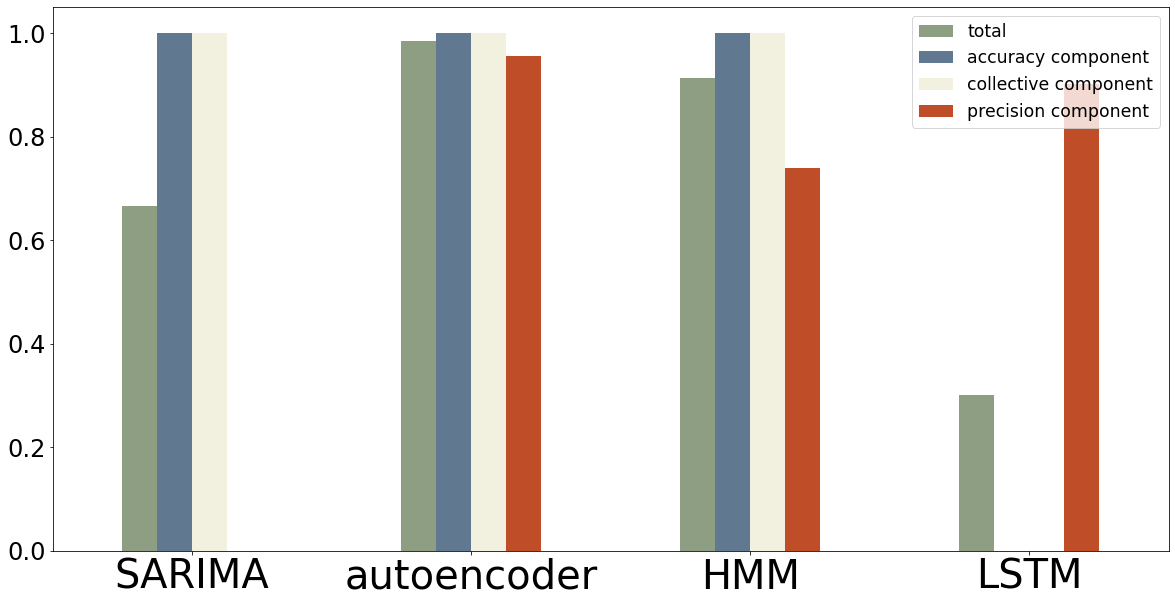

In [67]:
import numpy as np

reordered_dictionary = reorder_dictionary(eval_dict)

for k_file, v_file in reordered_dictionary.items():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(20, 10)

    eval_df = pd.DataFrame.from_dict(v_file)
    eval_df = eval_df.applymap(np.mean)
    eval_df.T.plot.bar(ax=ax, color=["#8e9e82", "#607890", "#f2f0df", "#bf4d28"])
    # fig.suptitle(k_file, fontsize=40, color="black")
    plt.xticks(fontsize=40, rotation="horizontal")
    plt.ylim([0.0, 1.05])
    # plt.show()
    plt.savefig(k_file + ".png", type="PNG")
    print("\n\n\n")


In [68]:
eval_dict

{'ec2_cpu_utilization_825cc2.csv': {'SARIMA': [{'total': 0.6421086561299186,
    'accuracy component': 1.0,
    'collective component': 0.5596577097133255,
    'precision component': 0.36666825867643016}],
  'autoencoder': [{'total': 0.6901508566576515,
    'accuracy component': 0.7251461988304093,
    'collective component': 0.36288983535403313,
    'precision component': 0.9824165357885122}],
  'HMM': [{'total': 0.7040748014941957,
    'accuracy component': 0.9285714285714286,
    'collective component': 0.40057197933289224,
    'precision component': 0.7830809965782661}],
  'LSTM': [{'total': 0.9395227093353413,
    'accuracy component': 1.0,
    'collective component': 1.0,
    'precision component': 0.8185681280060239}]},
 'rds_cpu_utilization_e47b3b.csv': {'SARIMA': [{'total': 0.6666666666666666,
    'accuracy component': 1.0,
    'collective component': 1.0,
    'precision component': 0.0}],
  'autoencoder': [{'total': 0.6991854759547363,
    'accuracy component': 1.0,
    'coll

In [69]:
def remove_file_from_dict(d: dict):
    temp_dict = {}
    result_dict = {}

    for k_file, v_file in d.items():
        for k_algo, v_algo in v_file.items():
            for algo_item in v_algo:
                for k_metric, v_metric in algo_item.items():
                    if k_algo not in temp_dict:
                        temp_dict[k_algo] = {}
                    if k_metric not in temp_dict[k_algo]:
                        temp_dict[k_algo][k_metric] = []
                    temp_dict[k_algo][k_metric].append(v_metric)

    for k_algo, v_algo in temp_dict.items():
        print(v_algo)
        for k_metric, v_metric in v_algo.items():
            if k_algo not in result_dict:
                result_dict[k_algo] = {}
            result_dict[k_algo][k_metric] = np.mean(v_metric)


    return result_dict

new_dict = remove_file_from_dict(eval_dict)

{'total': [0.6421086561299186, 0.6666666666666666, 0.6666666666666666], 'accuracy component': [1.0, 1.0, 1.0], 'collective component': [0.5596577097133255, 1.0, 1.0], 'precision component': [0.36666825867643016, 0.0, 0.0]}
{'total': [0.6901508566576515, 0.6991854759547363, 0.9853509976897482], 'accuracy component': [0.7251461988304093, 1.0, 1.0], 'collective component': [0.36288983535403313, 1.0, 1.0], 'precision component': [0.9824165357885122, 0.0975564278642087, 0.9560529930692448]}
{'total': [0.7040748014941957, 0.7033913477671061, 0.9128683726283461], 'accuracy component': [0.9285714285714286, 1.0, 1.0], 'collective component': [0.40057197933289224, 1.0, 1.0], 'precision component': [0.7830809965782661, 0.1101740433013183, 0.7386051178850381]}
{'total': [0.9395227093353413, 0.6666666666666666, 0.30054446024174913], 'accuracy component': [1.0, 1.0, 0.0], 'collective component': [1.0, 1.0, 0.0], 'precision component': [0.8185681280060239, 0.0, 0.9016333807252473]}


/home/maciek/Documents/Magisterka/kubernetes-anomaly-detector/venv_final/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  if sys.path[0] == '':


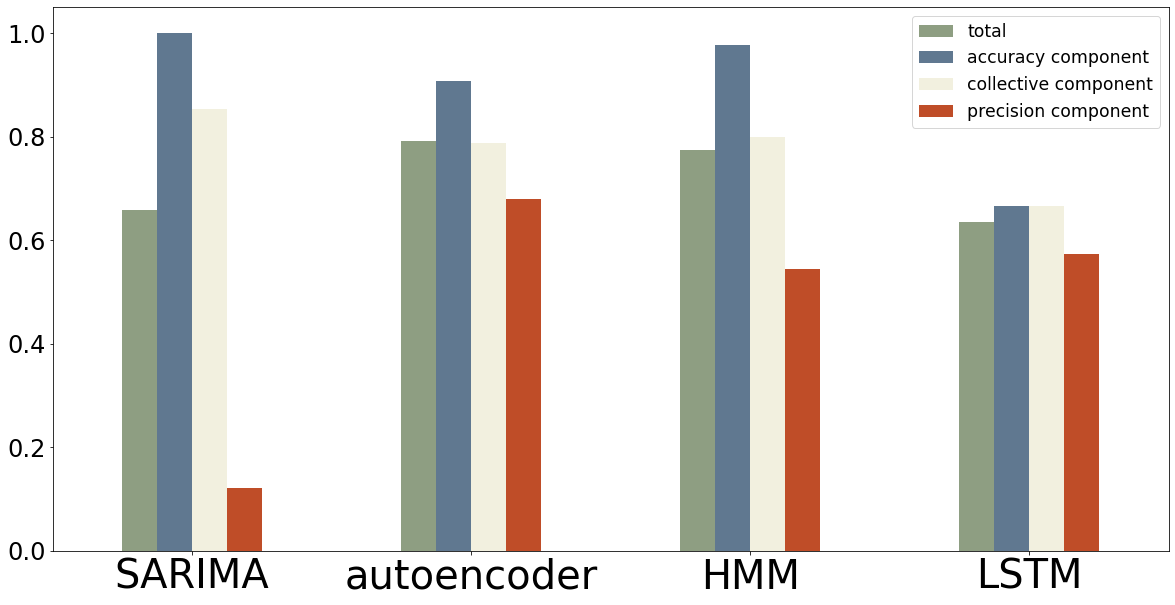

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(20, 10)

eval_df = pd.DataFrame.from_dict(new_dict)
eval_df = eval_df.applymap(np.mean)
eval_df.T.plot.bar(ax=ax, color=["#8e9e82", "#607890", "#f2f0df", "#bf4d28"])
# fig.suptitle(k_file, fontsize=40, color="black")
plt.xticks(fontsize=40, rotation="horizontal")
plt.ylim([0.0, 1.05])
# plt.show()
plt.savefig("real.png", type="PNG")
print("\n\n\n")
